In [1]:
import pandas as pd

In [2]:
#Data Loading and Understanding

In [3]:
State_Txn_and_Users = pd.read_excel(r"C:\Users\mukul\Desktop\Projects\PhonePay case study\Phonepe raw excel.xlsx",sheet_name = 0)
State_TxnSplit = pd.read_excel(r"C:\Users\mukul\Desktop\Projects\PhonePay case study\Phonepe raw excel.xlsx",sheet_name = 1)
State_DeviceData = pd.read_excel(r"C:\Users\mukul\Desktop\Projects\PhonePay case study\Phonepe raw excel.xlsx",sheet_name = 2)
District_Txn_and_Users = pd.read_excel(r"C:\Users\mukul\Desktop\Projects\PhonePay case study\Phonepe raw excel.xlsx",sheet_name = 3)
District_Demographics = pd.read_excel(r"C:\Users\mukul\Desktop\Projects\PhonePay case study\Phonepe raw excel.xlsx",sheet_name = 4)

### State_Txn_and_Users

In [97]:
#Top 5 Rows
State_Txn_and_Users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740,3355.630147,18596,0


In [5]:
#Checking Data Types
State_Txn_and_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB


In [6]:
#Chekcing Missing Value
State_Txn_and_Users.isna().any()

State               False
Year                False
Quarter             False
Transactions        False
Amount (INR)         True
ATV (INR)           False
Registered Users    False
App Opens           False
dtype: bool

In [7]:
#missing values in amount column
State_Txn_and_Users['Amount (INR)'].isna().sum()

np.int64(1)

In [8]:
#pct of missing value in amount column
# 0.19%
(State_Txn_and_Users['Amount (INR)'].isna().sum()/len(State_Txn_and_Users['Amount (INR)']))*100

np.float64(0.1984126984126984)

In [9]:
# removed one missing value form the dataset now total rows are 503 which were 504
State_Txn_and_Users.dropna(inplace = True)
State_Txn_and_Users.isna().any()

State               False
Year                False
Quarter             False
Transactions        False
Amount (INR)        False
ATV (INR)           False
Registered Users    False
App Opens           False
dtype: bool

In [10]:
# Transaction and Amount column were in scintific notion 
# Converted these column into int to use these columns in calculation
State_Txn_and_Users['Amount (INR)'] = State_Txn_and_Users['Amount (INR)'].astype(int)
State_Txn_and_Users['Amount (INR)'].head(5)

0     14631761
1     28338535
2     55557471
3     90548336
4    102299740
Name: Amount (INR), dtype: int64

In [11]:
#Stats
State_Txn_and_Users.iloc[:,3:].describe()

,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,5.030000e+02,5.030000e+02,503.000000,5.030000e+02,5.030000e+02
mean,4.024495e+07,7.083332e+10,1997.434707,4.750490e+06,9.603503e+07
std,8.161434e+07,1.440902e+11,601.512056,6.623356e+06,2.007983e+08
min,7.780000e+02,1.928611e+06,768.481188,5.010000e+02,0.000000e+00
25%,5.886805e+05,1.167157e+09,1600.360699,1.570995e+05,0.000000e+00
50%,6.150931e+06,1.051605e+10,1861.569003,1.743151e+06,2.922121e+06
75%,4.303897e+07,6.947045e+10,2259.551271,7.295528e+06,8.363467e+07
max,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


 ### State_TxnSplit

In [12]:
# Last 10 Rows
State_TxnSplit.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [13]:
#Checking Data types
State_TxnSplit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type  2514 non-null   object 
 4   Transactions      2514 non-null   int64  
 5   Amount (INR)      2514 non-null   float64
 6   ATV (INR)         2514 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 137.6+ KB


In [14]:
#Describe
State_TxnSplit.iloc[:,4:].describe()

,Transactions,Amount (INR),ATV (INR)
count,2.514000e+03,2.514000e+03,2514.000000
mean,8.167446e+06,1.443978e+10,1349.927929
std,2.423645e+07,5.995054e+10,1534.866221
min,2.000000e+00,3.439721e+01,17.198606
25%,2.788075e+04,1.762412e+07,385.735827
50%,2.687980e+05,1.901189e+08,720.940406
75%,3.683230e+06,2.661248e+09,1352.790116
max,2.795990e+08,8.721520e+11,7767.539936


In [15]:
#Checking Missing Values
State_TxnSplit.isna().any()

State               False
Year                False
Quarter             False
Transaction Type    False
Transactions        False
Amount (INR)        False
ATV (INR)           False
dtype: bool

### State_DeviceData

In [16]:
#Showing Middle 10 Rows
State_DeviceData.iloc[(len(State_DeviceData)//2)-5:(len(State_DeviceData)//2)+5]

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


In [17]:
#Checking Data Types
State_DeviceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             5544 non-null   object 
 1   Year              5544 non-null   int64  
 2   Quarter           5544 non-null   int64  
 3   Brand             5544 non-null   object 
 4   Registered Users  5544 non-null   int64  
 5   Percentage        5544 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 260.0+ KB


In [18]:
#Describe
State_DeviceData.loc[:,['Registered Users','Percentage']].describe()

,Registered Users,Percentage
count,5.544000e+03,5544.000000
mean,4.343183e+05,0.090909
std,9.056069e+05,0.083095
min,1.000000e+01,0.006373
25%,8.055750e+03,0.021588
50%,7.442250e+04,0.056914
75%,3.978875e+05,0.143626
max,9.764252e+06,0.478367


In [19]:
#Checking Missing Values
State_DeviceData.isna().any()

State               False
Year                False
Quarter             False
Brand               False
Registered Users    False
Percentage          False
dtype: bool

### District_Txn_and_Users

In [20]:
#Showing First 10 and last 10 Rows
pd.concat([District_Txn_and_Users.head(10),District_Txn_and_Users.tail(10)])        

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


In [21]:
#Checking Data Types
District_Txn_and_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10248 entries, 0 to 10247
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             10248 non-null  object 
 1   Year              10248 non-null  int64  
 2   Quarter           10248 non-null  int64  
 3   District          10248 non-null  object 
 4   Code              10220 non-null  object 
 5   Transactions      10248 non-null  int64  
 6   Amount (INR)      10248 non-null  float64
 7   ATV (INR)         10244 non-null  float64
 8   Registered Users  10248 non-null  int64  
 9   App Opens         10248 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 800.8+ KB


In [22]:
#Describe
District_Txn_and_Users.iloc[:,5:9].describe()

,Transactions,Amount (INR),ATV (INR),Registered Users
count,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04
mean,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05
std,9.613466e+06,1.473154e+10,600.943349,4.605978e+05
min,0.000000e+00,0.000000e+00,84.944283,2.200000e+01
25%,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04
50%,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05
75%,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05
max,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07


In [23]:
#Checking Missing Values
print(District_Txn_and_Users.isna().sum())

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64


In [24]:
#Checking pct of missing values in both the columns
print('code:',District_Txn_and_Users['Code'].isna().sum()/len(District_Txn_and_Users['Code'])*100)
print('ATV:',District_Txn_and_Users['ATV (INR)'].isna().sum()/len(District_Txn_and_Users['ATV (INR)'])*100)

code: 0.273224043715847
ATV: 0.039032006245121


### District_Demographics

In [25]:
#Showing data with a step of 10
District_Demographics.iloc[0::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


In [26]:
#Checking Data Types
District_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           742 non-null    object 
 1   District        742 non-null    object 
 2   Headquarters    742 non-null    object 
 3   Population      742 non-null    int64  
 4   Area (sq km)    742 non-null    float64
 5   Density         742 non-null    int64  
 6   Code            742 non-null    object 
 7   Alternate Name  742 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 46.5+ KB


In [27]:
#stats
District_Demographics.describe()

,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [28]:
#Checking Null Values
District_Demographics.isna().sum()

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [29]:
#Total States and Districts
print('No. of States:',State_Txn_and_Users['State'].nunique())
print('No. of Districts:',District_Txn_and_Users['District'].nunique())

No. of States: 36
No. of Districts: 723


In [30]:
#State with maximum district
District_Txn_and_Users.groupby('State')['District'].agg('nunique').idxmax()

'Uttar Pradesh'

### EDA

In [31]:
#Trend of Amount and Transaction by Year at State Level
total_amount_transaction = State_Txn_and_Users.pivot_table(index = 'State',columns = 'Year',values = ['Transactions','Amount (INR)'],aggfunc = 'sum').reset_index()
total_amount_transaction.rename(columns = {'Amount (INR)':'Total Amount','Transactions':'Total Transactions'},inplace = True)
total_amount_transaction

State  Total Amount                \
Year                                                2018          2019   
0                Andaman & Nicobar Islands     189076103     473464755   
1                           Andhra Pradesh  122072014668  537791374417   
2                        Arunachal Pradesh    1127123963    3465824193   
3                                    Assam   13207547439   47189496240   
4                                    Bihar   68085690827  265641475628   
5                               Chandigarh    4976604719   12511344052   
6                             Chhattisgarh   22132045737   76493959977   
7     Dadra & Nagar Haveli and Daman & Diu    1584119366    3855923787   
8                                    Delhi   95756508186  372397227322   
9                                      Goa    2648632614    7991018039   
10                                 Gujarat   62438058554  221330052545   
11                                 Haryana   59879940979  198402034602   
12                        Himachal Pradesh    6187247507   21100547733   
13                         Jammu & Kashmir   13255998739   17725904165   
14                               Jharkhand   25999250106   81863660123   
15                               Karnataka  173966953726  791262270256   
16                                  Kerala   19359984555   60847539054   
17                                  Ladakh     279481578    1067934313   
18                             Lakshadweep      16918665      38950328   
19                          Madhya Pradesh   82661034745  298769094183   
20                             Maharashtra  189848425278  737327096551   
21                                 Manipur    1370270697    3447137686   
22                               Meghalaya     730694266    2246623524   
23                                 Mizoram     435763214    1113660852   
24                                Nagaland     861137677    2447502003   
25                                  Odisha   59640327895  217255933792   
26                              Puducherry    1494976830    5510656608   
27                                  Punjab   25313100052   85084901246   
28                               Rajasthan   86435235059  422169171827   
29                                  Sikkim     826565607    3258113926   
30                              Tamil Nadu  104019568189  302562182996   
31                               Telangana  117864587292  733876491894   
32                                 Tripura    1453619619    3831494005   
33                           Uttar Pradesh  131769030562  432248763486   
34                             Uttarakhand   13569145912   38074800400   
35                             West Bengal  111588715416  266014506612   

                                   Total Transactions                         \
Year           2020           2021               2018       2019        2020   
0        1296423415     1682853583              58021     133104      446274   
1     1677246580652   850737499108           77779112  297180254   763616699   
2        9388678099     8270204695             435229    1314871     3547905   
3      110492731050   110518937922            8806777   22691015    47135224   
4      650297855402   655553904887           44556885  131986927   266563978   
5       20210041053    16014094798            2383031    5884404     8861323   
6      168870698967   148138614520           13933118   45826483    98023091   
7        7095440036     6123301372            1044832    2559192     4807834   
8      632919032873   548869442727           64231244  254461712   364821900   
9       15862123988    17770096466            1244738    4114941     9080241   
10     427697735576   393862835265           39761960  134749574   231865328   
11     432253934292   369295655320           31843908  113047107   226926755   
12      39961478635    30616181448            3364250   10922850    21602414   
13      38561427678    3

In [32]:
#Same as above in group by 
State_Txn_and_Users.groupby(['State','Year']).agg({'Transactions':'sum','Amount (INR)':'sum'})

Transactions  Amount (INR)
State                     Year                            
Andaman & Nicobar Islands 2018         58021     189076103
                          2019        133104     473464755
                          2020        446274    1296423415
                          2021        586166    1682853583
Andhra Pradesh            2018      77779112  122072014668
...                                      ...           ...
Uttarakhand               2021      44608834   77279007273
West Bengal               2018     120011635  111588715416
                          2019     257900590  266014506612
                          2020     304222327  552731584287
                          2021     260151489  522372018533

[144 rows x 2 columns]

In [33]:
#States by Transaction Volume
top5_state_by_transaction_volume = State_Txn_and_Users.groupby('State')['Transactions'].sum().nlargest(5)
bottom5_state_by_transaction_volume = State_Txn_and_Users.groupby('State')['Transactions'].sum().nsmallest(5)
print('Top 5:',top5_state_by_transaction_volume)
print('Bottom 5:',bottom5_state_by_transaction_volume)

Top 5: State
Karnataka         2981044533
Maharashtra       2833670154
Telangana         2347430243
Andhra Pradesh    1491343199
Rajasthan         1382918930
Name: Transactions, dtype: int64
Bottom 5: State
Lakshadweep                    71610
Andaman & Nicobar Islands    1223565
Ladakh                       1880109
Mizoram                      2162776
Meghalaya                    5648913
Name: Transactions, dtype: int64


In [34]:
State_TxnSplit.head(3)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432


In [35]:
#Most frequent transaction type per state and quarter
TransacionType_frequent = State_TxnSplit.groupby(['State','Quarter','Transaction Type'])['Transactions'].sum().reset_index()
frequent_txn_by_quarter_state = TransacionType_frequent.loc[TransacionType_frequent.groupby(['State','Quarter'])['Transactions'].idxmax()].reset_index(drop = True)
frequent_txn_by_quarter_state

,State,Quarter,Transaction Type,Transactions
0,Andaman & Nicobar Islands,1,Peer-to-peer payments,138772
1,Andaman & Nicobar Islands,2,Recharge & bill payments,180447
2,Andaman & Nicobar Islands,3,Recharge & bill payments,84165
3,Andaman & Nicobar Islands,4,Peer-to-peer payments,110018
4,Andhra Pradesh,1,Peer-to-peer payments,255236515
...,...,...,...,...
139,Uttarakhand,4,Peer-to-peer payments,11515030
140,West Bengal,1,Peer-to-peer payments,114083760
141,West Bengal,2,Peer-to-peer payments,118087640
142,West Bengal,3,Peer-to-peer payments,100961691


In [36]:
#Most used device brand by State
State_device = State_DeviceData.groupby(['State','Brand'])['Registered Users'].sum().reset_index()
device_highest_users = State_device.iloc[State_device.groupby(['State'])['Registered Users'].idxmax()].reset_index(drop = True)
device_highest_users

,State,Brand,Registered Users
0,Andaman & Nicobar Islands,Xiaomi,97889
1,Andhra Pradesh,Xiaomi,40061549
2,Arunachal Pradesh,Xiaomi,437803
3,Assam,Xiaomi,6979357
4,Bihar,Xiaomi,33721314
5,Chandigarh,Xiaomi,896628
6,Chhattisgarh,Xiaomi,8763373
7,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
8,Delhi,Xiaomi,24114984
9,Goa,Xiaomi,1208672


In [37]:
District_Demographics.head(4)

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur


In [38]:
#Finding district with highest population per state
State_district_highest_population = District_Demographics.loc[
    District_Demographics.groupby('State')['Population'].idxmax(), ['State', 'District', 'Population'] 
].reset_index(drop=True)
State_district_highest_population

,State,District,Population
0,Andaman & Nicobar Islands,South Andaman,238142
1,Andhra Pradesh,East Godavari,5151549
2,Arunachal Pradesh,Papum Pare,176385
3,Assam,Nagaon,2826006
4,Bihar,Patna,5772804
5,Chandigarh,Chandigarh,1055450
6,Chhattisgarh,Raipur,2160876
7,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709
8,Delhi,North West Delhi,3656539
9,Goa,North Goa,817761


In [39]:
State_Txn_and_Users.head(3)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3415.768284,12149,0


In [40]:
#Showing Average ATV For Each State Top and Bottom 5
Average_ATV = State_Txn_and_Users.groupby('State')['ATV (INR)'].mean().reset_index()
Average_ATV_top_bottom_5 = pd.concat([Average_ATV.head(5),Average_ATV.tail(5)])
Average_ATV_top_bottom_5

,State,ATV (INR)
0,Andaman & Nicobar Islands,3159.266422
1,Andhra Pradesh,1882.560051
2,Arunachal Pradesh,2638.323985
3,Assam,2008.495656
4,Bihar,2023.316978
31,Telangana,1842.949086
32,Tripura,1554.156042
33,Uttar Pradesh,1659.379431
34,Uttarakhand,1672.608685
35,West Bengal,1373.600590


In [41]:
State_Txn_and_Users.head(3)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3415.768284,12149,0


In [42]:
#Analyzing app usage trend
AppOpens_Per_State = State_Txn_and_Users.groupby('State').agg({'App Opens':'sum'}).reset_index()

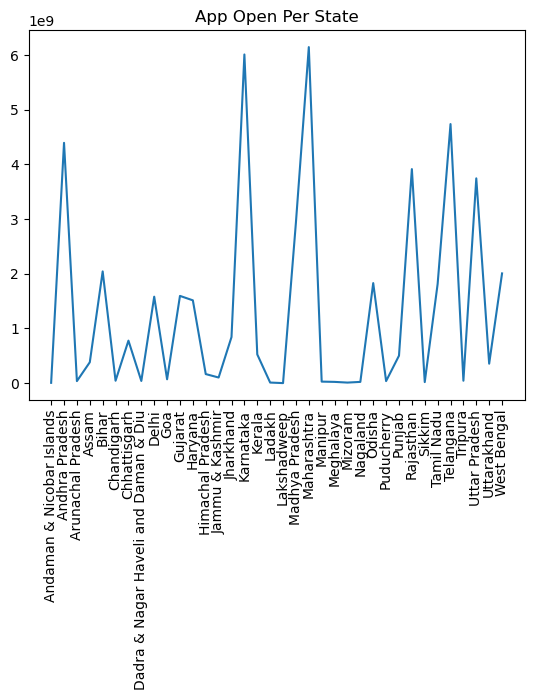

In [43]:
import matplotlib.pyplot as plt
plt.plot(AppOpens_Per_State['State'],AppOpens_Per_State['App Opens'])
plt.title('App Open Per State')
plt.xticks(rotation = 90)
plt.show()


### Data Merging And Advance Analysis

In [44]:
#4.1
State_Txn_and_Users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740,3355.630147,18596,0


In [45]:
#Finding users ratio to population by state
df_sorted = State_Txn_and_Users.sort_values(['State','Year','Quarter'])
latest_state_txn = df_sorted.groupby('State').tail(1).reset_index(drop=True)
State_Users = latest_state_txn.loc[:,['State','Registered Users']]
State_Population = District_Demographics.groupby('State')['Population'].sum().reset_index()
User_Population = pd.merge(State_Users,State_Population, on = 'State',how = 'inner')
User_Population['User_percentage'] = round((User_Population['Registered Users']/User_Population['Population']),1)
User_Population.head(3)

,State,Registered Users,Population,User_percentage
0,Andaman & Nicobar Islands,62095,380581,0.2
1,Andhra Pradesh,19620905,49378776,0.4
2,Arunachal Pradesh,270572,1606047,0.2


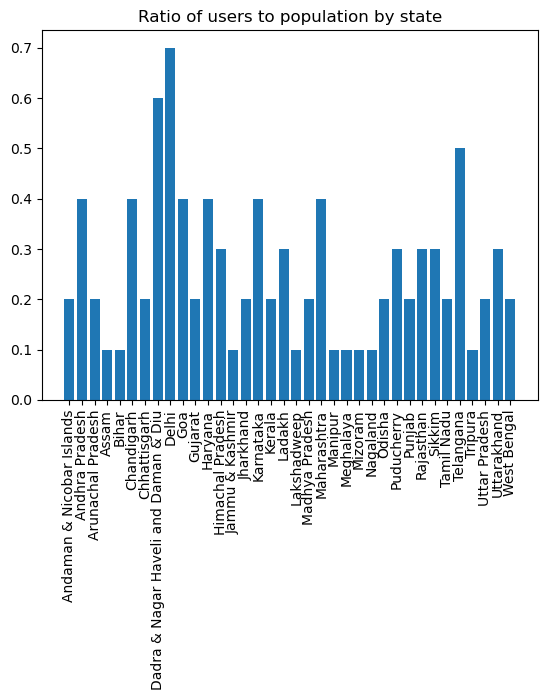

In [46]:
import matplotlib.pyplot as plt
plt.bar(User_Population['State'],User_Population['User_percentage'])
plt.title('Ratio of users to population by state')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Density', ylabel='Transactions'>

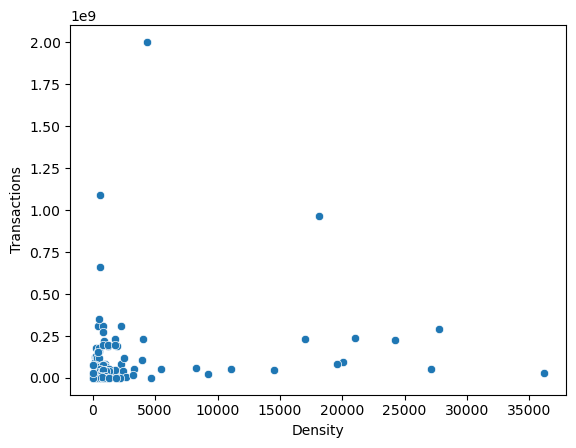

In [47]:
# 4.2 Population density with transaction volume
Dist_tnx = District_Txn_and_Users.groupby('Code')['Transactions'].sum().reset_index()
Density_tnx = pd.merge(District_Demographics,Dist_tnx,on = 'Code',how = 'inner')
import seaborn as sns
sns.scatterplot(x ='Density',y= 'Transactions',data = Density_tnx)

In [48]:
#4.3 Average Transaction amount per user
State_Txn_and_Users.head(15)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740,3355.630147,18596,0
5,Andaman & Nicobar Islands,2019,2,33689,120254709,3569.554148,21731,52640
6,Andaman & Nicobar Islands,2019,3,33770,114071776,3377.902757,23931,171107
7,Andaman & Nicobar Islands,2019,4,35159,136838530,3891.991539,25960,177012
8,Andaman & Nicobar Islands,2020,1,41298,161476312,3910.027418,28368,193586
9,Andaman & Nicobar Islands,2020,2,62962,169645001,2694.402996,32710,305072


In [49]:
#Calculating average transaction per user
avg_tnx_per_user = latest_state_txn.loc[:,['State','Amount (INR)','Registered Users']]
avg_tnx_per_user['tnx_user'] = round(avg_tnx_per_user['Amount (INR)']/avg_tnx_per_user['Registered Users'],1)
#Top 5 and bottom 5 by average transaction per user
pd.concat([avg_tnx_per_user.sort_values('tnx_user',ascending = False).head(5),avg_tnx_per_user.sort_values('tnx_user',ascending = False).tail(5)]).reset_index(drop = True)

,State,Amount (INR),Registered Users,tnx_user
0,Telangana,1027958332797,18306880,56151.5
1,Andhra Pradesh,850737499108,19620905,43358.7
2,Karnataka,837887151230,25751023,32538.0
3,Rajasthan,561702765169,18980985,29592.9
4,Madhya Pradesh,425500768035,15940935,26692.3
5,Kerala,74226806436,7416083,10008.9
6,Himachal Pradesh,16495634539,1743151,9463.1
7,Dadra & Nagar Haveli and Daman & Diu,3157668461,344994,9152.8
8,Tripura,3468154361,472153,7345.4
9,Lakshadweep,27383463,4896,5593.0


### Data Visualization

In [90]:
#numbers of transaction over year for a particular state
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_state_transactions(state_name):
    # Filter and group data for the given state
    state_txn = (
        State_Txn_and_Users[State_Txn_and_Users['State'] == state_name]
        .groupby(['Year', 'State'])
        .agg({'Transactions': 'sum', 'Amount (INR)': 'sum'})
        .reset_index()
    )
    
    # chart
    plt.figure(figsize=(8,5))
    plt.plot(state_txn['Year'], state_txn['Transactions'], marker='o')
    plt.xlabel("Year")
    plt.ylabel("Transactions (in Millions)")
    plt.title(f"Transactions Over Years - {state_name}")
    
    # X-axis: integer years
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    
    # Y-axis: show values in millions
    plt.gca().yaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
    )
    
   
    plt.show()

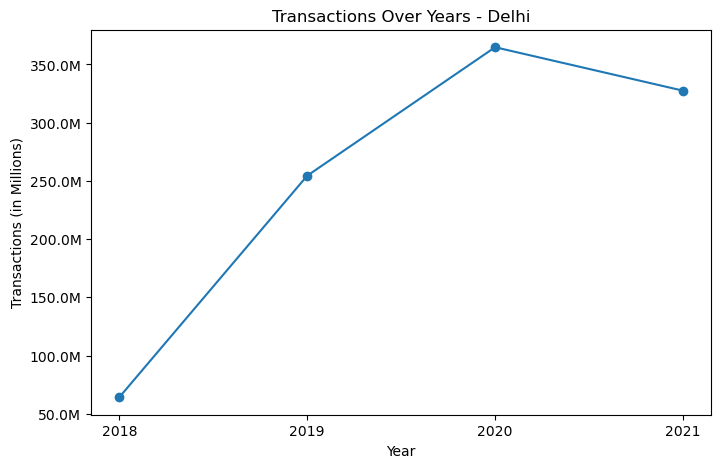

In [91]:
plot_state_transactions('Delhi')

In [104]:
State_TxnSplit['Amount (INR)'] = State_TxnSplit['Amount (INR)'].astype(int)

In [109]:
State_TxnSplit.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [120]:
#Transaction type distribution
def plot_transaction_type_distribution(state_name, year, quarter):
    # Filter data for the selected state, year, and quarter
    df_filtered = State_TxnSplit[
        (State_TxnSplit['State'] == state_name) &
        (State_TxnSplit['Year'] == year) &
        (State_TxnSplit['Quarter'] == quarter)
    ]
  
    # Aggregate total transactions per Transaction Type
    txn_distribution = df_filtered.groupby('Transaction Type')['Transactions'].sum()
    
    # Plot pie chart
    plt.pie(txn_distribution, labels=txn_distribution.index, 
            autopct='%1.1f%%', startangle=140)
    plt.title(f"Transaction Type Distribution - {state_name}, Q{quarter} {year}")
    plt.show()

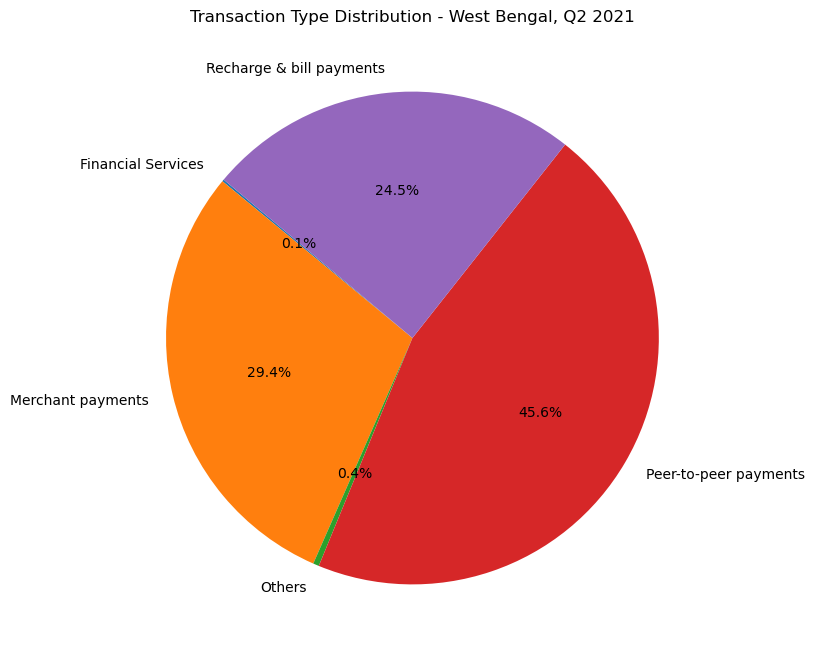

In [119]:
plot_transaction_type_distribution('West Bengal',2021,2)


In [121]:
District_Demographics

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR
...,...,...,...,...,...,...,...,...
737,Delhi,West Delhi,Rajouri Garden,2543243,112.0,19563,DL11,West
738,Puducherry,Karaikal,Karaikal,200222,157.0,1275,PY01,Karaikal
739,Puducherry,Mahé,Mahé,41816,9.0,4646,PY02,Mahe
740,Puducherry,Puducherry,Pondicherry,950289,293.0,3232,PY03,Puducherry


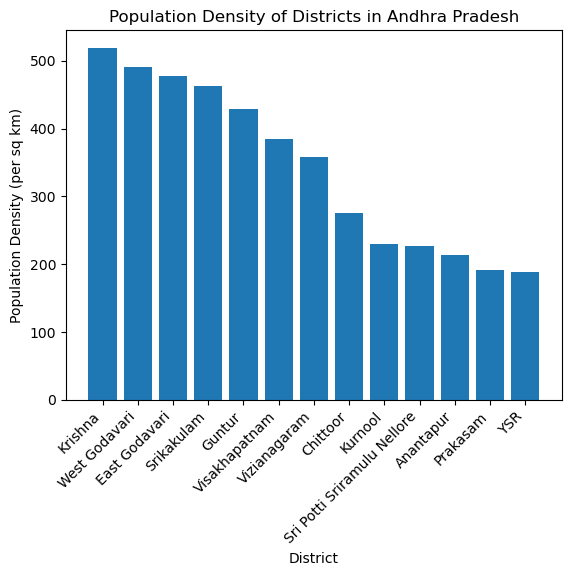

In [131]:
#Population Density of Districts
def plot_population_density(state_name):
    # Filter data for the selected state
    df_filtered = District_Demographics[District_Demographics['State'] == state_name]
    
    # Sort districts by density
    df_filtered = df_filtered.sort_values(by='Density', ascending=False)
    
    # Chart
    plt.bar(df_filtered['District'], df_filtered['Density'])
    plt.xlabel("District")
    plt.ylabel("Population Density (per sq km)")
    plt.title(f"Population Density of Districts in {state_name}")
    plt.xticks(rotation=45, ha='right')  
    plt.show()
plot_population_density('Andhra Pradesh')    

### Insights and Conclusions

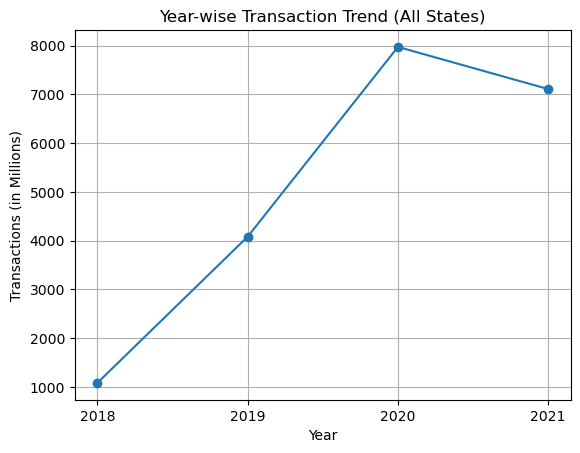

In [176]:
yearly_txn = State_Txn_and_Users.groupby('Year')['Transactions'].sum().reset_index()
plt.plot(yearly_txn['Year'], yearly_txn['Transactions']/1e6, marker='o')
plt.xlabel('Year')
plt.ylabel('Transactions (in Millions)')
plt.title('Year-wise Transaction Trend (All States)')
plt.grid()
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.show()

In [181]:
Quarterly_Summary = State_Txn_and_Users.groupby(['Year','Quarter'])['Transactions'].sum().reset_index()
Quarterly_Pivot = Quarterly_Summary.pivot(index='Year', columns='Quarter', values='Transactions')


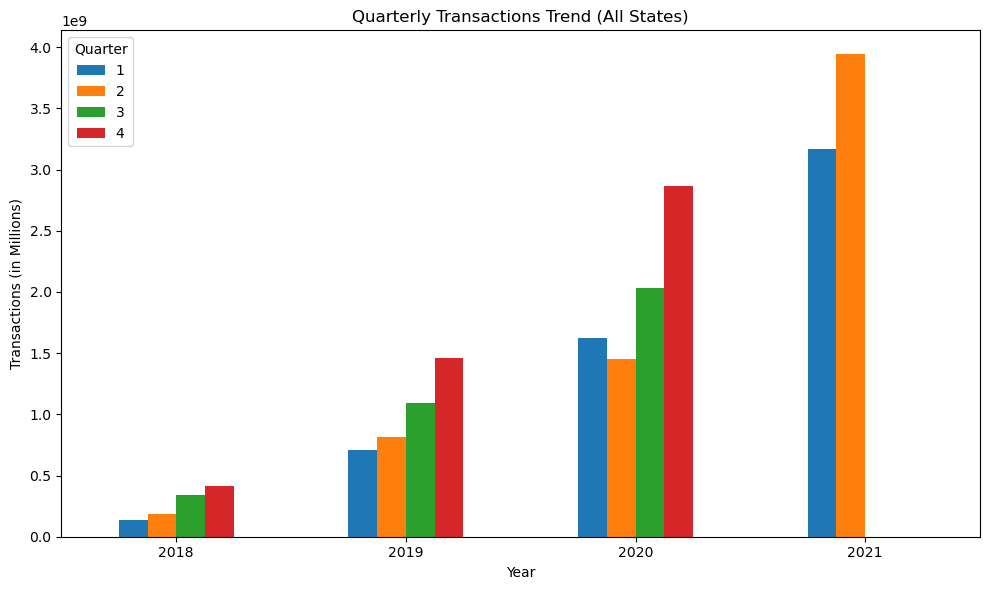

In [184]:
import matplotlib.pyplot as plt

Quarterly_Pivot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Transactions (in Millions)')
plt.xlabel('Year')
plt.title('Quarterly Transactions Trend (All States)')
plt.legend(title='Quarter', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [191]:
Txn_State = (
    State_Txn_and_Users
    .groupby('State')[['Transactions','Amount (INR)','Registered Users','App Opens']]
    .sum()
    .reset_index()
)

Demo_State = (
    District_Demographics
    .groupby('State')[['Population','Density']]
    .sum()
    .reset_index()
)

State_Demo_Txn = pd.merge(Txn_State, Demo_State, on='State', how='inner')
correlations = {
    "Population vs Transactions": State_Demo_Txn['Population'].corr(State_Demo_Txn['Transactions']),
    "Density vs Transactions": State_Demo_Txn['Density'].corr(State_Demo_Txn['Transactions']),
    "Population vs Registered Users": State_Demo_Txn['Population'].corr(State_Demo_Txn['Registered Users']),
    "Density vs App Opens": State_Demo_Txn['Density'].corr(State_Demo_Txn['App Opens'])
}
correlations

{'Population vs Transactions': np.float64(0.6219610120972584),
 'Density vs Transactions': np.float64(0.40681847903487184),
 'Population vs Registered Users': np.float64(0.8640700257017783),
 'Density vs App Opens': np.float64(0.36038379178689744)}

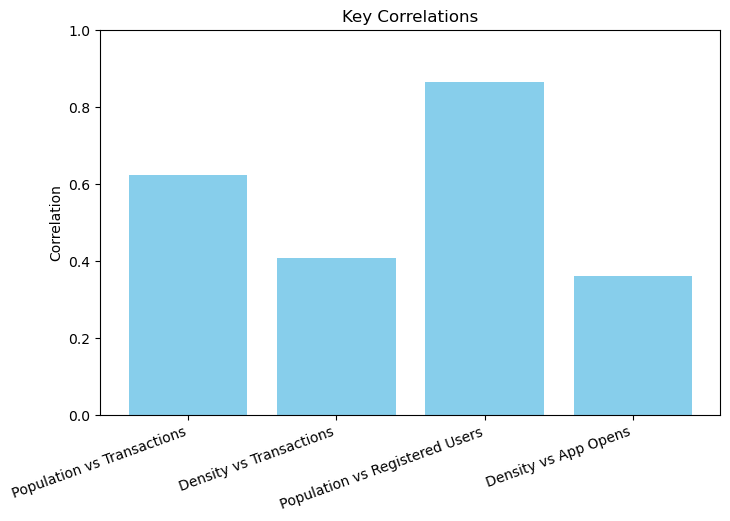

In [195]:

plt.figure(figsize=(8,5))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.xticks(rotation=20, ha='right')
plt.ylabel("Correlation")
plt.title("Key Correlations")
plt.ylim(0,1)  # because correlation ranges between -1 and +1
plt.show()

In [199]:
print("""
Key Findings & Insights:

1. Transaction Trends:
   - Transactions have shown a steady growth year-on-year across most states.
   - 2020 quarter 2 show drop, which may be because of pandemic.

2. Demographic Correlation:
   - Population and Registered Users - Strong positive correlation (0.86), 
     showing that states with larger populations onboard more users.
   - Population and Transactions - Moderate correlation (0.62), 
     meaning more populous states tend to have higher digital activity.
   - Population Density and Transactions - Weak-to-moderate correlation (0.40),
     suggesting that density alone isn’t a strong driver of digital payments.
   - App Opens show weak correlation with Density (0.36), 
     implying that usage behavior may depend more on awareness and infrastructure than just density.

3. Actionable Recommendations:
   - Focus user acquisition campaigns in high-population states where transaction volumes are still lower 
     (untapped potential).
   - For dense but low-transaction regions, invest in digital literacy programs and merchant onboarding 
     to improve adoption.

Overall, population is the most consistent driver of digital adoption.
""")



Key Findings & Insights:

1. Transaction Trends:
   - Transactions have shown a steady growth year-on-year across most states.
   - 2020 quarter 2 show drop, which may be because of pandemic.

2. Demographic Correlation:
   - Population and Registered Users - Strong positive correlation (0.86), 
     showing that states with larger populations onboard more users.
   - Population and Transactions - Moderate correlation (0.62), 
     meaning more populous states tend to have higher digital activity.
   - Population Density and Transactions - Weak-to-moderate correlation (0.40),
     suggesting that density alone isn’t a strong driver of digital payments.
   - App Opens show weak correlation with Density (0.36), 
     implying that usage behavior may depend more on awareness and infrastructure than just density.

3. Actionable Recommendations:
   - Focus user acquisition campaigns in high-population states where transaction volumes are still lower 
     (untapped potential).
   - For den